<a href="https://colab.research.google.com/github/mi3ou/Data-Analysis/blob/main/Android_Malware_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

-The main objective of this Machine Learning project is to predict whether an
android application is malicious or benign

-we are going to use multiple static features to study the behaviour of an malicious and a benign app.

     static features: pieces of informations extracted from an app without running it.
-we can classify these static features on 4 categories:

*   Manifest Permissions
*   API calls
*   Intents.
*   commands signature







In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Importation (From Kaggle)

we are going to import two datasets :

1.   **dataset-features-categories.csv** describe each static feature and it's category (API Call category)

2.   **drebin-215-dataset-5560malware-9476-benign.csv**
  
     *  Dataset consisting of feature vectors of 215 attributes extracted from **15,036 application**s (**5,560 malware apps** from Drebin project and **9,476 benign apps**). The dataset has been used to develop and evaluate multilevel classifier fusion approach for Android malware detection
     *   Each row represents an app
     *   Each column is a static feature that is a criteria to decide if an app is malicious or not







In [80]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("shashwatwork/android-malware-dataset-for-machine-learning")

print("Path to dataset files:", path)
print(os.listdir(path))

Using Colab cache for faster access to the 'android-malware-dataset-for-machine-learning' dataset.
Path to dataset files: /kaggle/input/android-malware-dataset-for-machine-learning
['dataset-features-categories.csv', 'drebin-215-dataset-5560malware-9476-benign.csv']


In [81]:
static_features = pd.read_csv(os.path.join(path, "dataset-features-categories.csv"))
data = pd.read_csv(os.path.join(path, "drebin-215-dataset-5560malware-9476-benign.csv"))

/tmp/ipython-input-2590893037.py:2: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(os.path.join(path, "drebin-215-dataset-5560malware-9476-benign.csv"))


In [82]:
data.dtypes.unique()

array([dtype('int64'), dtype('O')], dtype=object)

# Count of static Features

Dispaly our static features dataset

In [83]:
static_features.head()

,transact,API call signature
0,onServiceConnected,API call signature
1,bindService,API call signature
2,attachInterface,API call signature
3,ServiceConnection,API call signature
4,android.os.Binder,API call signature


In [84]:
static_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   transact            215 non-null    object
 1   API call signature  215 non-null    object
dtypes: object(2)
memory usage: 3.5+ KB


Display the count of the static features for each category

In [85]:
features_dist = static_features["API call signature"].value_counts()
features_dist

,count
API call signature,
Manifest Permission,113
API call signature,72
Intent,23
Commands signature,6
B=Benign; S=Malware,1


([0, 1, 2, 3, 4],
 [Text(0, 0, 'API call signature'),
  Text(1, 0, 'Manifest Permission'),
  Text(2, 0, 'Intent'),
  Text(3, 0, 'Commands signature'),
  Text(4, 0, 'B=Benign; S=Malware')])

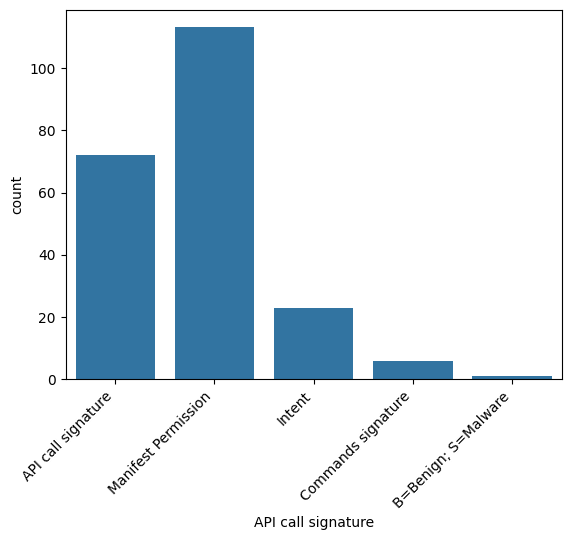

In [86]:
sns.countplot(x="API call signature", data=static_features)
plt.xticks(rotation = 45, ha="right")

In [87]:
# number of unique static_features
len(static_features["transact"].unique())

215

# Data preprocessing

In [88]:
data.head()

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,S
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,S


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15036 entries, 0 to 15035
Columns: 216 entries, transact to class
dtypes: int64(214), object(2)
memory usage: 24.8+ MB


We got two columns that are object type and we have to extract them, clean them and convert them to int64 type

In [90]:
data.select_dtypes(include="object").columns

Index(['TelephonyManager.getSimCountryIso', 'class'], dtype='object')

cleaning the class column







In [91]:
data["class"].unique()

array(['S', 'B'], dtype=object)

In [92]:
data["class"] = data["class"].replace({"B":0,"S":1})

/tmp/ipython-input-2880350393.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["class"] = data["class"].replace({"B":0,"S":1})


In [93]:
data["class"].unique()

array([1, 0])

cleaning the TelephonyManager.getSimCountryIso column

In [94]:
data["TelephonyManager.getSimCountryIso"].unique()

array(['0', '1', '?', 1, 0], dtype=object)

In [95]:
data["TelephonyManager.getSimCountryIso"] = data["TelephonyManager.getSimCountryIso"].replace({"0":0,"1":1})

In [96]:
data = data[data["TelephonyManager.getSimCountryIso"] != "?"]

In [97]:
data["TelephonyManager.getSimCountryIso"] = data["TelephonyManager.getSimCountryIso"].astype(int)

In [98]:
data["TelephonyManager.getSimCountryIso"].unique()

array([0, 1])

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15031 entries, 0 to 15035
Columns: 216 entries, transact to class
dtypes: int64(216)
memory usage: 24.9 MB


checking if there is some null rows

In [100]:
data.isna().sum().unique()

array([0])

Label conflicts


*   check if two apps has the same static features but with different labels




In [101]:
feature_cols = [col for col in data.columns if col != "class"]

duplicates = data[data.duplicated(subset=feature_cols, keep=False)]
conflicts = duplicates.groupby(feature_cols)
conflicts = duplicates.groupby(feature_cols)['class'].nunique()

# 4. Filter the conflicting ones
conflicting_duplicates = conflicts[conflicts > 1]

conflicting_duplicates


transact  onServiceConnected  bindService  attachInterface  ServiceConnection  android.os.Binder  SEND_SMS  Ljava.lang.Class.getCanonicalName  Ljava.lang.Class.getMethods  Ljava.lang.Class.cast  Ljava.net.URLDecoder  android.content.pm.Signature  android.telephony.SmsManager  READ_PHONE_STATE  getBinder  ClassLoader  Landroid.content.Context.registerReceiver  Ljava.lang.Class.getField  Landroid.content.Context.unregisterReceiver  GET_ACCOUNTS  RECEIVE_SMS  Ljava.lang.Class.getDeclaredField  READ_SMS  getCallingUid  Ljavax.crypto.spec.SecretKeySpec  android.intent.action.BOOT_COMPLETED  USE_CREDENTIALS  MANAGE_ACCOUNTS  android.content.pm.PackageInfo  KeySpec  TelephonyManager.getLine1Number  DexClassLoader  HttpGet.init  SecretKey  Ljava.lang.Class.getMethod  System.loadLibrary  android.intent.action.SEND  Ljavax.crypto.Cipher  WRITE_SMS  READ_SYNC_SETTINGS  AUTHENTICATE_ACCOUNTS  android.telephony.gsm.SmsManager  WRITE_HISTORY_BOOKMARKS  TelephonyManager.getSubscriberId  mount  INSTALL_PACKAGES  Runtime.getRuntime  CAMERA  Ljava.lang.Object.getClass  WRITE_SYNC_SETTINGS  READ_HISTORY_BOOKMARKS  Ljava.lang.Class.forName  INTERNET  android.intent.action.PACKAGE_REPLACED  Binder  android.intent.action.SEND_MULTIPLE  RECORD_AUDIO  IBinder  android.os.IBinder  createSubprocess  NFC  ACCESS_LOCATION_EXTRA_COMMANDS  URLClassLoader  WRITE_APN_SETTINGS  abortBroadcast  BIND_REMOTEVIEWS  android.intent.action.TIME_SET  READ_PROFILE  TelephonyManager.getDeviceId  MODIFY_AUDIO_SETTINGS  getCallingPid  READ_SYNC_STATS  BROADCAST_STICKY  android.intent.action.PACKAGE_REMOVED  android.intent.action.TIMEZONE_CHANGED  WAKE_LOCK  RECEIVE_BOOT_COMPLETED  RESTART_PACKAGES  Ljava.lang.Class.getPackage  chmod  Ljava.lang.Class.getDeclaredClasses  android.intent.action.ACTION_POWER_DISCONNECTED  android.intent.action.PACKAGE_ADDED  PathClassLoader  TelephonyManager.getSimSerialNumber  Runtime.load  TelephonyManager.getCallState  BLUETOOTH  READ_CALENDAR  READ_CALL_LOG  SUBSCRIBED_FEEDS_WRITE  READ_EXTERNAL_STORAGE  TelephonyManager.getSimCountryIso  sendMultipartTextMessage  PackageInstaller  VIBRATE  remount  android.intent.action.ACTION_SHUTDOWN  sendDataMessage  ACCESS_NETWORK_STATE  chown  HttpPost.init  Ljava.lang.Class.getClasses  SUBSCRIBED_FEEDS_READ  TelephonyManager.isNetworkRoaming  CHANGE_WIFI_MULTICAST_STATE  WRITE_CALENDAR  android.intent.action.PACKAGE_DATA_CLEARED  MASTER_CLEAR  HttpUriRequest  UPDATE_DEVICE_STATS  WRITE_CALL_LOG  DELETE_PACKAGES  GET_TASKS  GLOBAL_SEARCH  DELETE_CACHE_FILES  WRITE_USER_DICTIONARY  android.intent.action.PACKAGE_CHANGED  android.intent.action.NEW_OUTGOING_CALL  REORDER_TASKS  WRITE_PROFILE  SET_WALLPAPER  BIND_INPUT_METHOD  divideMessage  READ_SOCIAL_STREAM  READ_USER_DICTIONARY  PROCESS_OUTGOING_CALLS  CALL_PRIVILEGED  Runtime.exec  BIND_WALLPAPER  RECEIVE_WAP_PUSH  DUMP  BATTERY_STATS  ACCESS_COARSE_LOCATION  SET_TIME  android.intent.action.SENDTO  WRITE_SOCIAL_STREAM  WRITE_SETTINGS  REBOOT  BLUETOOTH_ADMIN  TelephonyManager.getNetworkOperator  /system/bin  MessengerService  BIND_DEVICE_ADMIN  WRITE_GSERVICES  IRemoteService  KILL_BACKGROUND_PROCESSES  SET_ALARM  ACCOUNT_MANAGER  /system/app  android.intent.action.CALL  STATUS_BAR  TelephonyManager.getSimOperator  PERSISTENT_ACTIVITY  CHANGE_NETWORK_STATE  onBind  Process.start  android.intent.action.SCREEN_ON  Context.bindService  RECEIVE_MMS  SET_TIME_ZONE  android.intent.action.BATTERY_OKAY  CONTROL_LOCATION_UPDATES  BROADCAST_WAP_PUSH  BIND_ACCESSIBILITY_SERVICE  ADD_VOICEMAIL  CALL_PHONE  ProcessBuilder  BIND_APPWIDGET  FLASHLIGHT  READ_LOGS  Ljava.lang.Class.getResource  defineClass  SET_PROCESS_LIMIT  android.intent.action.PACKAGE_RESTARTED  MOUNT_UNMOUNT_FILESYSTEMS  BIND_TEXT_SERVICE  INSTALL_LOCATION_PROVIDER  android.intent.action.CALL_BUTTON  android.intent.action.SCREEN_OFF  findClass  SYSTEM_ALERT_WINDOW  MOUNT_FORMAT_FILESYSTEMS  CHANGE_CONFIGURATION  CLEAR_APP_USER_DATA  intent.action.RUN  android.intent.action.SET_WALLPAPER  CHANG

# Building ML model

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [103]:
from numpy._core.numeric import cross
X = data.drop(columns="class").values
y = data["class"].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42, shuffle=True, stratify=y)
results = []

models = {"Random_forest":RandomForestClassifier(random_state=42), "log_reg": LogisticRegression(), "knn": KNeighborsClassifier()}
for name, model in models.items():
  cv_scores = cross_val_score(estimator=model, X=X_train, y=y_train, cv=5)
  results.append(cv_scores)

In [104]:
results

[array([0.98359202, 0.98669623, 0.98891353, 0.98669033, 0.98580302]),
 array([0.97250554, 0.97738359, 0.9751663 , 0.97826087, 0.97870453]),
 array([0.97960089, 0.97427938, 0.98359202, 0.9809228 , 0.97648625])]

In [105]:
cv_results_df = pd.DataFrame(results).T
cv_results_df
cv_results_df.columns = models.keys()
cv_results_df

,Random_forest,log_reg,knn
0,0.983592,0.972506,0.979601
1,0.986696,0.977384,0.974279
2,0.988914,0.975166,0.983592
3,0.986690,0.978261,0.980923
4,0.985803,0.978705,0.976486


Text(0.5, 1.0, 'Cross val score distribution for each model')

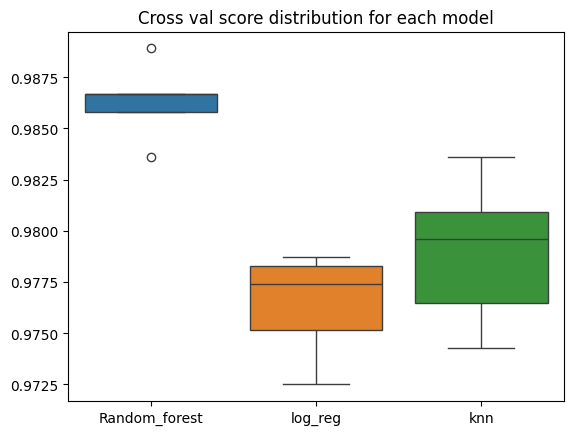

In [106]:
sns.boxplot(data=cv_results_df)
plt.title("Cross val score distribution for each model")

In [107]:
from sklearn.metrics import confusion_matrix, classification_report

best_model = RandomForestClassifier(random_state=42)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print(f"classification report \n {classification_report(y_test, y_pred)}")

classification report 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2369
           1       0.99      0.98      0.98      1389

    accuracy                           0.99      3758
   macro avg       0.99      0.99      0.99      3758
weighted avg       0.99      0.99      0.99      3758



<Axes: >

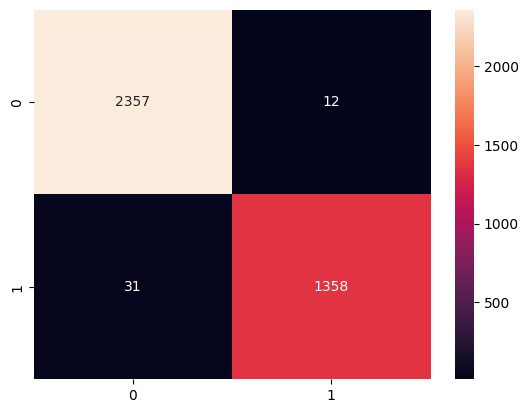

In [108]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

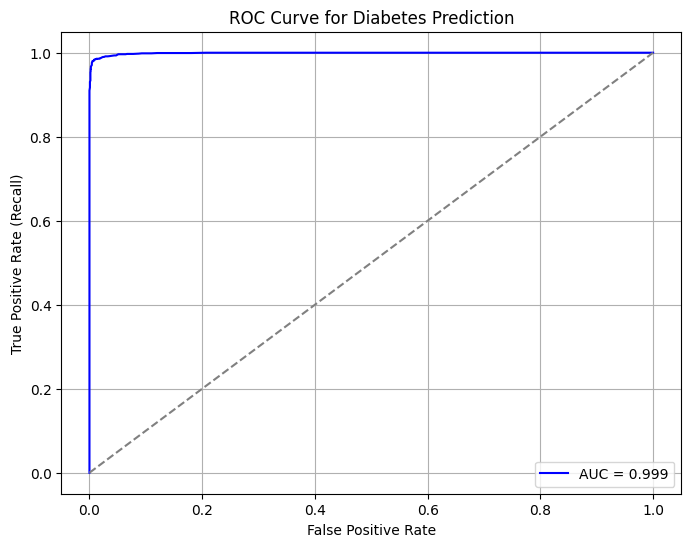

In [109]:
from sklearn.metrics import roc_curve,roc_auc_score
y_proba = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve for Diabetes Prediction')
plt.legend()
plt.grid(True)
plt.show()

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15031 entries, 0 to 15035
Columns: 216 entries, transact to class
dtypes: int64(216)
memory usage: 24.9 MB
